In [428]:
%matplotlib inline

from math import sqrt

import numpy as np
import pandas as pd

In [429]:
df = pd.read_csv('../data/horsey.csv', parse_dates=['round_date'])

In [430]:
print(df.iloc[0])

round_date                          2016-11-18 00:00:00
round_no                                              2
hole_no                                              13
shot_no                                               1
putt                                                NaN
completed                                          True
left_to_pin_before                                 7560
left_to_pin_after                                   360
penalty                                             NaN
player_name                                David Horsey
name                  DP World Tour Championship, Dubai
course_id                                            48
start_tee                                             1
score                                                 3
par                                                   3
yards                                               204
lie_after                                         Green
lie_before                                      

In [431]:
df.head()

,round_date,round_no,hole_no,shot_no,putt,completed,left_to_pin_before,left_to_pin_after,penalty,player_name,name,course_id,start_tee,score,par,yards,lie_after,lie_before,club,direction
0,2016-11-18,2,13,1,NaN,True,7560,360.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,3,3,204,Green,Tee,iron,center
1,2016-11-18,2,13,2,True,True,360,12.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,3,3,204,Green,Green,putter,short
2,2016-11-18,2,13,3,True,True,12,1.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,3,3,204,Hole,Green,putter,center
3,2016-11-18,2,18,1,NaN,True,19440,9324.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,4,5,620,Fairway,Tee,driver,center
4,2016-11-18,2,18,2,NaN,True,9324,2520.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,4,5,620,Fairway,Fairway,iron,center


In [432]:
# helper functions

def bin_num(x, base):
    if pd.isnull(x):
        return x

    return int(x - (x % base))

In [433]:
# add some columns

df['is_putt'] = df['putt'] == True
df['score_norm'] = df['score'] - df['par']
df['hole_norm'] = df.apply(lambda r: (r['hole_no'] - r['start_tee']) % 18, axis=1)

df['before_ft'] = df['left_to_pin_before'] / 12.0
df['before_yds'] = df['left_to_pin_before'] / 36.0
df['after_ft'] = df['left_to_pin_after'] / 12.0
df['after_yds'] = df['left_to_pin_after'] / 36.0

for c in ['before_ft', 'before_yds', 'after_ft', 'after_yds']:
    df['{}_r'.format(c)] = round(df[c])
    
df['before_ft_bin_5'] = df['before_ft_r'].apply(lambda x: bin_num(x, 5))
df['after_ft_bin_5'] = df['after_ft_r'].apply(lambda x: bin_num(x, 5))

df['before_yds_bin_10'] = df['before_yds_r'].apply(lambda x: bin_num(x, 10))
df['after_yds_bin_10'] = df['after_yds_r'].apply(lambda x: bin_num(x, 10))

df['before_yds_bin_25'] = df['before_yds_r'].apply(lambda x: bin_num(x, 25))
df['after_yds_bin_25'] = df['after_yds_r'].apply(lambda x: bin_num(x, 25))

df.iloc[10]

round_date                          2016-11-19 00:00:00
round_no                                              3
hole_no                                               2
shot_no                                               4
putt                                                NaN
completed                                          True
left_to_pin_before                                 1260
left_to_pin_after                                    48
penalty                                             NaN
player_name                                David Horsey
name                  DP World Tour Championship, Dubai
course_id                                            48
start_tee                                             1
score                                                 5
par                                                   5
yards                                               583
lie_after                                         Green
lie_before                               Fairway

In [434]:
putts = df[(df.putt == True) & (df.club == 'putter')].copy()

putts['made_it'] = putts['lie_after'] == 'Hole'
putts['putts_needed'] = putts['score'] - putts['shot_no'] + 1

cols = [
    'round_date', 'round_no', 'hole_no', 'shot_no',
    'left_to_pin_before', 'left_to_pin_after', 'score', 'par', 'direction',
    'made_it', 'before_ft', 'after_ft', 'putts_needed', 
]

putts = putts[cols]

putts.head(20)

,round_date,round_no,hole_no,shot_no,left_to_pin_before,left_to_pin_after,score,par,direction,made_it,before_ft,after_ft,putts_needed
1,2016-11-18,2,13,2,360,12.0,3,3,short,False,30.0,1.000000,2
2,2016-11-18,2,13,3,12,1.0,3,3,center,True,1.0,0.083333,1
6,2016-11-18,2,18,4,72,1.0,4,5,center,True,6.0,0.083333,1
11,2016-11-19,3,2,5,48,1.0,5,5,center,True,4.0,0.083333,1
14,2016-11-19,3,1,3,216,1.0,3,4,center,True,18.0,0.083333,1
17,2016-11-19,3,3,3,600,60.0,4,4,long right,False,50.0,5.000000,2
18,2016-11-19,3,3,4,60,1.0,4,4,center,True,5.0,0.083333,1
20,2016-11-19,3,4,2,540,72.0,3,3,long right,False,45.0,6.000000,2
21,2016-11-19,3,4,3,72,1.0,3,3,center,True,6.0,0.083333,1
23,2016-11-10,1,9,4,324,12.0,5,5,left,False,27.0,1.000000,2


In [435]:
aggs = {
    'made_it': {
        'putts': len,
        'make': lambda x: sum(x) / len(x),
    },
    'putts_needed': {
        '1': lambda x: (x == 1).sum(),
        '2': lambda x: (x == 2).sum(),
        '3': lambda x: (x == 3).sum(),
    }
}

putt_stats = putts.groupby('before_ft').agg(aggs).reset_index()

putt_stats['fractional_par'] = putt_stats.apply(
    lambda r: sum([
        r['putts_needed'][num] / r['made_it']['putts'] * float(num)
        for num in ['1', '2', '3']
    ]),
    axis=1
)

putt_stats[:15]

before_ft made_it           putts_needed        fractional_par
               putts      make            1   2  3               
0        1.0     438  1.000000          438   0  0       1.000000
1        2.0      81  0.987654           80   1  0       1.012346
2        3.0      67  0.940299           63   4  0       1.059701
3        4.0      39  0.897436           35   3  1       1.128205
4        5.0      56  0.750000           42  14  0       1.250000
5        6.0      45  0.644444           29  15  1       1.377778
6        7.0      42  0.714286           30  11  1       1.309524
7        8.0      35  0.514286           18  17  0       1.485714
8        9.0      52  0.461538           24  28  0       1.538462
9       10.0      31  0.516129           16  15  0       1.483871
10      11.0      19  0.315789            6  13  0       1.684211
11      12.0      39  0.615385           24  15  0       1.384615
12      13.0      12  0.333333            4   8  0       1.666667
13      14.0      12  0.333333            4   8  0       1.666667
14      15.0      50  0.240000           12  38  0       1.760000

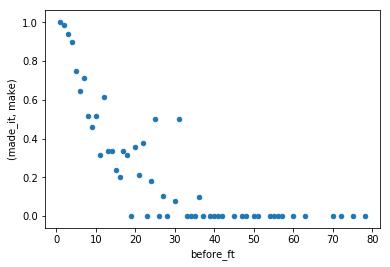

In [436]:
putt_stats.plot(kind='scatter', x='before_ft', y=('made_it', 'make'))

In [437]:
putts.iloc[0]

round_date            2016-11-18 00:00:00
round_no                                2
hole_no                                13
shot_no                                 2
left_to_pin_before                    360
left_to_pin_after                      12
score                                   3
par                                     3
direction                           short
made_it                             False
before_ft                              30
after_ft                                1
putts_needed                            2
Name: 1, dtype: object

In [438]:
# misreads / bad putts

g = putts.groupby('round_date')

miss_summary = g['after_ft'].agg({
    'putts': len,
    'miss_gt_4': lambda x: (x >= 4).sum(),
    'miss_gt_6': lambda x: (x >= 6).sum(),
})

miss_summary.head(10)

,putts,miss_gt_4,miss_gt_6
round_date,,,
2016-06-23,30.0,1.0,1.0
2016-06-24,30.0,1.0,1.0
2016-06-25,26.0,1.0,0.0
2016-06-26,25.0,2.0,1.0
2016-06-30,33.0,3.0,0.0
2016-07-01,34.0,2.0,1.0
2016-07-07,30.0,3.0,2.0
2016-07-08,32.0,2.0,1.0
2016-08-18,31.0,5.0,0.0


In [439]:
miss_summary.describe()

,putts,miss_gt_4,miss_gt_6
count,49.000000,49.000000,49.000000
mean,28.346939,1.204082,0.510204
std,2.194226,1.172241,0.710705
min,23.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000
50%,28.000000,1.000000,0.000000
75%,30.000000,2.000000,1.000000
max,34.000000,5.000000,2.000000


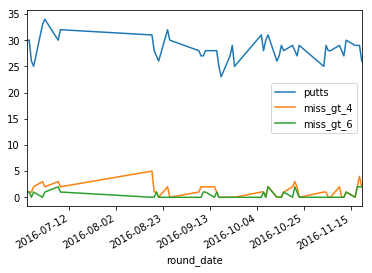

In [440]:
miss_summary.plot()

In [441]:
# misses under 10 feet

miss_lt_10 = putts.query('before_ft <= 10 & made_it == False').copy()

miss_lt_10.groupby('direction').size().sort_values(ascending=False)

direction
right         53
left          43
long right     9
long left      3
short left     2
short          1
dtype: int64

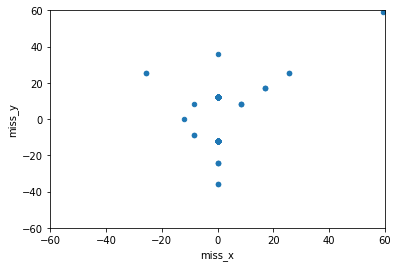

In [442]:
# plot misses

directions = {
    'long': [0, 1],
    'long right': [1, 1],
    'right': [0, 1],
    'short right': [1, -1],
    'short': [-1, 0],
    'short left': [-1, -1],
    'left': [0, -1],
    'long left': [-1, 1],
}

def make_coord(row):
    pt, inches = directions[row['direction']], row['left_to_pin_after']
    is_diagonal = pt[0] != 0 and pt[1] != 0
    pt = [p * inches / (sqrt(2) if is_diagonal else 1) for p in pt]
    return pd.Series(pt)


miss_lt_10[['miss_x', 'miss_y']] = miss_lt_10.apply(make_coord, axis=1)

miss_lt_10 \
    .query('left_to_pin_after < 300') \
    .plot(kind='scatter', x='miss_x', y='miss_y', xlim=(-60, 60), ylim=(-60, 60))

In [443]:
# approach game

approach = df.query('club != "driver" & club != "putter"').copy()
approach = approach.query('before_yds >= 50 & before_yds < 250')
approach = approach.query('lie_before != "Tee" & par != 3')

print(len(approach))
print(approach.groupby('lie_before').size())

688
lie_before
Fairway               456
Fairway Bunker         26
Greenside Bunker        1
Intermediate Rough     90
Other                   8
Rough                 107
dtype: int64


In [444]:
g = approach.groupby('before_yds_bin_10')

a_summary = g['after_ft'].agg({
    'shots': len,
    'mean': np.mean,
    'median': np.median,
    'std': np.std,
})

a_summary

,shots,mean,median,std
before_yds_bin_10,,,,
50,17.0,22.588235,9.0,29.430127
60,21.0,20.904762,12.0,24.576218
70,23.0,14.869565,10.0,11.318948
80,24.0,23.708333,12.0,25.162911
90,25.0,21.400000,20.0,16.595682
100,36.0,16.611111,16.0,9.681434
110,24.0,19.913043,16.0,12.587559
120,52.0,18.250000,15.0,14.006826
130,42.0,27.952381,21.5,34.437609


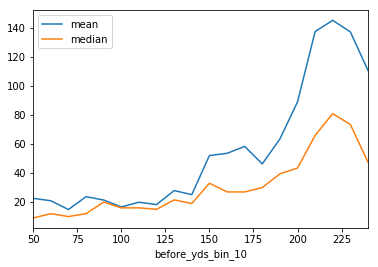

In [445]:
a_summary.plot(y=['mean', 'median'])

In [446]:
# rough penalty

lies = ['Fairway', 'Intermediate Rough', 'Rough']
fair_v_rough = approach[
    (approach.lie_before.isin(lies)) &
    (approach.before_yds < 200)
].copy()

fair_v_rough.groupby('before_yds_bin_25').size()

before_yds_bin_25
50      48
75      60
100     85
125    119
150    130
175    123
dtype: int64

In [447]:
g = fair_v_rough.groupby(['before_yds_bin_25', 'lie_before'])

g['after_ft'].agg({
    'shots': len,
    'mean': np.mean,
    'median': np.median,
}).unstack()

shots                                mean  \
lie_before        Fairway Intermediate Rough Rough    Fairway   
before_yds_bin_25                                               
50                   25.0               11.0  12.0  11.920000   
75                   48.0                9.0   3.0  20.708333   
100                  65.0               11.0   9.0  17.384615   
125                  86.0               19.0  14.0  19.441860   
150                  91.0               16.0  23.0  28.351648   
175                  84.0               19.0  20.0  31.797619   

                                                  median                     \
lie_before        Intermediate Rough       Rough Fairway Intermediate Rough   
before_yds_bin_25                                                             
50                         18.909091   26.250000     8.0                7.0   
75                         20.777778   38.000000    13.5               21.0   
100                        12.272727   26.750000    16.0               12.0   
125                        23.789474   52.357143    15.0               24.0   
150                        27.500000   89.173913    27.0               25.5   
175                        43.315789  141.450000    27.0               42.0   

                          
lie_before         Rough  
before_yds_bin_25         
50                  26.5  
75                  27.0  
100                 21.5  
125                 46.5  
150                 45.0  
175                102.0

In [448]:
scoring = fair_v_rough.pivot_table(
    'score_norm',
    index=['before_yds_bin_25'],
    columns=['lie_before'],
    aggfunc=np.mean,
    fill_value=0
)

scoring['diff'] = scoring['Rough'] - scoring['Fairway']
scoring

lie_before,Fairway,Intermediate Rough,Rough,diff
before_yds_bin_25,,,,
50,-0.280000,-0.363636,0.333333,0.613333
75,-0.041667,-0.111111,0.000000,0.041667
100,-0.230769,-0.545455,0.555556,0.786325
125,-0.162791,-0.263158,0.285714,0.448505
150,-0.087912,-0.250000,0.434783,0.522695
175,-0.107143,0.157895,0.400000,0.507143


In [449]:
# driver misses

locs = ['center', 'left', 'right']
drives = df.query('club == "driver" & direction == {}'.format(locs)).copy()

g = drives.groupby('direction')
g.size() / g.size().sum()

direction
center    0.642978
left      0.147208
right     0.209814
dtype: float64

In [450]:
g['score_norm'].agg({
    'mean': np.mean,
    'std': np.std,
    'drives': len,
})

,mean,std,drives
direction,,,
center,-0.242105,0.615813,380
left,0.126437,1.032097,87
right,0.217742,0.879398,124


direction  center  left  right  total  center_p    left_p   right_p
hole_norm                                                          
0              26     5      7     38  0.684211  0.131579  0.184211
1              16    11      6     33  0.484848  0.333333  0.181818
2              26     8      9     43  0.604651  0.186047  0.209302
3              10     4      3     17  0.588235  0.235294  0.176471
4              19     7     12     38  0.500000  0.184211  0.315789
5              22     4      9     35  0.628571  0.114286  0.257143
6              18     2      2     22  0.818182  0.090909  0.090909
7              17     3      4     24  0.708333  0.125000  0.166667
8              33     2     11     46  0.717391  0.043478  0.239130
9              27     2      5     34  0.794118  0.058824  0.147059
10             18     4      6     28  0.642857  0.142857  0.214286
11             24     8      7     39  0.615385  0.205128  0.179487
12             15     3      7     25  0.600000 

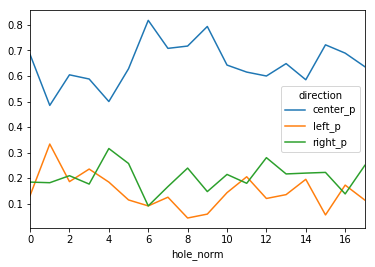

In [451]:
by_hole = drives.groupby(['hole_norm', 'direction']).size().unstack()
by_hole['total'] = by_hole.sum(axis=1)

for c in ['center', 'left', 'right']:
    by_hole['{}_p'.format(c)] = by_hole[c] * 1.0 / by_hole.total

print(by_hole)
by_hole.ix[:, -3:].plot()

In [452]:
# par 5 analysis

par5 = df.query('par == 5').copy()
par5.iloc[0]

round_date                          2016-11-18 00:00:00
round_no                                              2
hole_no                                              18
shot_no                                               1
putt                                                NaN
completed                                          True
left_to_pin_before                                19440
left_to_pin_after                                  9324
penalty                                             NaN
player_name                                David Horsey
name                  DP World Tour Championship, Dubai
course_id                                            48
start_tee                                             1
score                                                 4
par                                                   5
yards                                               620
lie_after                                       Fairway
lie_before                                      

In [453]:
LAYUP_THRESHOLD = 50 # yards

def risk_reward(group):
    q = group.query('shot_no == 2')
    s2 = q.iloc[0].to_dict() if len(q) else {}
    results = {'went_for_it': None, 'score_norm': None}
    
    if s2:    
        results['went_for_it'] = s2['after_yds'] < LAYUP_THRESHOLD
        results['score_norm'] = s2['score_norm']
    
    return pd.Series(results)
    
g = par5.groupby(['round_date', 'round_no', 'hole_no'])

risk_reward = g.apply(risk_reward)
risk_reward.head(20)

score_norm  went_for_it
round_date round_no hole_no                         
2016-06-23 1        3              -1.0          0.0
                    7               0.0          0.0
                    13              0.0          0.0
                    15             -1.0          1.0
2016-06-24 2        3               0.0          0.0
                    7               0.0          0.0
                    13             -1.0          1.0
                    15             -1.0          0.0
2016-06-25 3        3              -1.0          0.0
                    7              -1.0          0.0
                    13             -2.0          1.0
                    15             -1.0          0.0
2016-06-26 4        3               0.0          1.0
                    7              -1.0          0.0
                    13             -1.0          1.0
                    15              0.0          0.0
2016-06-30 1        3               NaN          NaN
                    9               3.0          0.0
                    14              0.0          0.0
2016-07-01 2        3               1.0          0.0

In [454]:
risk_reward.groupby('went_for_it').mean()

,score_norm
went_for_it,
0.0,-0.241379
1.0,-0.703704


In [455]:
LAYUP_THRESHOLD = 50 # yards

par5_s2 = df.query('par == 5 & shot_no == 2').copy()

par5_s2['went_for_it'] = par5_s2['after_yds'] < LAYUP_THRESHOLD
par5_s2.groupby('went_for_it')['score_norm'].agg({ 'num': len, 'avg': np.mean })

,num,avg
went_for_it,,
False,116,-0.241379
True,54,-0.703704


In [456]:
g = par5_s2.groupby(['lie_before', 'went_for_it'])

s2_lie = g['score_norm'].agg({ 'num': len, 'avg': np.mean }).unstack()
s2_lie['diff'] = s2_lie['avg', True] - s2_lie['avg', False]
s2_lie

num             avg                diff
went_for_it        False  True     False      True          
lie_before                                                  
Fairway             60.0  45.0 -0.333333 -0.688889 -0.355556
Fairway Bunker       4.0   NaN  0.000000       NaN       NaN
Intermediate Rough  25.0   7.0 -0.480000 -0.857143 -0.377143
Other                3.0   NaN  0.000000       NaN       NaN
Rough               24.0   2.0  0.166667 -0.500000 -0.666667

In [457]:
g = par5_s2.groupby(['before_yds_bin_25', 'went_for_it'])

s2_dist = g['score_norm'].agg({ 'num': len, 'avg': np.mean }).unstack()
s2_dist['num'] =  s2_dist['num'].fillna(0)

s2_dist['score_diff'] = s2_dist['avg', True] - s2_dist['avg', False]
s2_dist

num             avg           score_diff
went_for_it       False  True     False      True           
before_yds_bin_25                                           
175                 0.0   5.0       NaN -0.600000        NaN
200                 3.0   3.0 -1.000000 -1.000000   0.000000
225                 6.0  17.0 -0.166667 -0.823529  -0.656863
250                21.0  21.0 -0.333333 -0.571429  -0.238095
275                37.0   8.0 -0.297297 -0.750000  -0.452703
300                21.0   0.0 -0.380952       NaN        NaN
325                20.0   0.0  0.050000       NaN        NaN
350                 6.0   0.0 -0.166667       NaN        NaN
375                 2.0   0.0  1.000000       NaN        NaN

In [458]:
df.iloc[0]

round_date                          2016-11-18 00:00:00
round_no                                              2
hole_no                                              13
shot_no                                               1
putt                                                NaN
completed                                          True
left_to_pin_before                                 7560
left_to_pin_after                                   360
penalty                                             NaN
player_name                                David Horsey
name                  DP World Tour Championship, Dubai
course_id                                            48
start_tee                                             1
score                                                 3
par                                                   3
yards                                               204
lie_after                                         Green
lie_before                                      

In [459]:
df.lie_after.value_counts()

Green                 1394
Hole                   882
Fairway                601
Rough                  192
Intermediate Rough     168
Green Fringe            67
Greenside Bunker        58
Fairway Bunker          31
Other                   11
Water                    6
Out of Bounds            2
Name: lie_after, dtype: int64

In [460]:
# computing strokes gains

shot_val = df.copy()
shot_val['next_is_putt'] = df['lie_after'] == 'Green'

def categorize(is_putt, ft, ft5, yds25, is_done=False):
    if is_done:
        return 'done'
    
    if pd.isnull(yds25):
        return 'na'
    
    if is_putt:
        ft, ft5 = round(ft), round(ft5)
        cat = 'p_{}_ft'.format(ft if ft < 10 else '{}_to_{}'.format(ft5, ft5 + 5))
    else:
        yds25 = round(yds25)
        cat = 'o_{}_to_{}_yds'.format(yds25, yds25 + 25)
    
    return cat

shot_val['category'] = shot_val.apply(
    lambda r: categorize(r.is_putt, r.before_ft_r, r.before_ft_bin_5, r.before_yds_bin_25), axis=1
)

shot_val['next_category'] = shot_val.apply(
    lambda r: categorize(r.next_is_putt, r.after_ft_r, r.after_ft_bin_5, r.after_yds_bin_25, r.lie_after == 'Hole'), axis=1
)

shot_val['shots_left'] = shot_val['score'] - shot_val['shot_no'] + 1
shot_val['next_shots_left'] = shot_val['shots_left'] - 1

shot_val.iloc[0]

round_date                          2016-11-18 00:00:00
round_no                                              2
hole_no                                              13
shot_no                                               1
putt                                                NaN
completed                                          True
left_to_pin_before                                 7560
left_to_pin_after                                   360
penalty                                             NaN
player_name                                David Horsey
name                  DP World Tour Championship, Dubai
course_id                                            48
start_tee                                             1
score                                                 3
par                                                   3
yards                                               204
lie_after                                         Green
lie_before                                      

In [461]:
baseline = shot_val.groupby('category').agg({ 'shots_left': np.mean })
baseline.head()

,shots_left
category,
o_0_to_25_yds,2.270042
o_100_to_125_yds,2.755556
o_125_to_150_yds,2.813433
o_150_to_175_yds,2.984375
o_175_to_200_yds,3.085427


In [462]:
# convert to dict

baseline_lookup = baseline.to_dict()['shots_left']
baseline_lookup['done'] = 0

In [463]:
shot_val.columns

Index(['round_date', 'round_no', 'hole_no', 'shot_no', 'putt', 'completed',
       'left_to_pin_before', 'left_to_pin_after', 'penalty', 'player_name',
       'name', 'course_id', 'start_tee', 'score', 'par', 'yards', 'lie_after',
       'lie_before', 'club', 'direction', 'is_putt', 'score_norm', 'hole_norm',
       'before_ft', 'before_yds', 'after_ft', 'after_yds', 'before_ft_r',
       'before_yds_r', 'after_ft_r', 'after_yds_r', 'before_ft_bin_5',
       'after_ft_bin_5', 'before_yds_bin_10', 'after_yds_bin_10',
       'before_yds_bin_25', 'after_yds_bin_25', 'next_is_putt', 'category',
       'next_category', 'shots_left', 'next_shots_left'],
      dtype='object')

In [466]:
cols = [
    'round_date', 'round_no', 'hole_no', 'shot_no',
    'lie_before', 'lie_after',
    'before_yds', 'before_ft', 'after_yds', 'after_ft',
    'score', 'par', 'club',
    'category', 'next_category',
]

sg = shot_val.query('next_category != "na"').copy()
sg = sg[cols]

sg['baseline'] = sg['category'].apply(lambda x: baseline_lookup[x])
sg['next_baseline'] = sg['next_category'].apply(lambda x: baseline_lookup[x])
sg['strokes_gained'] = sg['baseline'] - sg['next_baseline'] - 1 

sg.head(10)

,round_date,round_no,hole_no,shot_no,lie_before,lie_after,before_yds,before_ft,after_yds,after_ft,score,par,club,category,next_category,baseline,next_baseline,strokes_gained
0,2016-11-18,2,13,1,Tee,Green,210.000000,630.0,10.000000,30.000000,3,3,iron,o_200_to_225_yds,p_30_to_35_ft,3.147826,2.000000,0.147826
1,2016-11-18,2,13,2,Green,Green,10.000000,30.0,0.333333,1.000000,3,3,putter,p_30_to_35_ft,p_1_ft,2.000000,1.000000,0.000000
2,2016-11-18,2,13,3,Green,Hole,0.333333,1.0,0.027778,0.083333,3,3,putter,p_1_ft,done,1.000000,0.000000,0.000000
3,2016-11-18,2,18,1,Tee,Fairway,540.000000,1620.0,259.000000,777.000000,4,5,driver,o_525_to_550_yds,o_250_to_275_yds,4.615385,3.553191,0.062193
4,2016-11-18,2,18,2,Fairway,Fairway,259.000000,777.0,70.000000,210.000000,4,5,iron,o_250_to_275_yds,o_50_to_75_yds,3.553191,2.591837,-0.038645
5,2016-11-18,2,18,3,Fairway,Green,70.000000,210.0,2.000000,6.000000,4,5,wedge,o_50_to_75_yds,p_6_ft,2.591837,1.377778,0.214059
6,2016-11-18,2,18,4,Green,Hole,2.000000,6.0,0.027778,0.083333,4,5,putter,p_6_ft,done,1.377778,0.000000,0.377778
7,2016-11-19,3,2,1,Tee,Intermediate Rough,578.000000,1734.0,306.000000,918.000000,5,5,driver,o_575_to_600_yds,o_300_to_325_yds,4.880000,3.551724,0.328276
8,2016-11-19,3,2,2,Intermediate Rough,Intermediate Rough,306.000000,918.0,68.000000,204.000000,5,5,hybrid,o_300_to_325_yds,o_50_to_75_yds,3.551724,2.591837,-0.040113
9,2016-11-19,3,2,3,Intermediate Rough,Fairway Bunker,68.000000,204.0,35.000000,105.000000,5,5,wedge,o_50_to_75_yds,o_25_to_50_yds,2.591837,2.718750,-1.126913


In [467]:
sg.sort_values(by='strokes_gained', ascending=False).head(10)

,round_date,round_no,hole_no,shot_no,lie_before,lie_after,before_yds,before_ft,after_yds,after_ft,score,par,club,category,next_category,baseline,next_baseline,strokes_gained
2644,2016-10-23,4,5,3,Fairway,Hole,31.0,93.0,0.027778,0.083333,3,5,iron,o_25_to_50_yds,done,2.718750,0.000000,1.718750
1731,2016-09-17,3,10,2,Intermediate Rough,Hole,8.0,24.0,0.027778,0.083333,2,3,wedge,o_0_to_25_yds,done,2.270042,0.000000,1.270042
1697,2016-09-17,3,1,4,Green Fringe,Hole,5.0,15.0,0.027778,0.083333,4,5,putter,o_0_to_25_yds,done,2.270042,0.000000,1.270042
1503,2016-09-10,3,17,3,Green Fringe,Hole,5.0,15.0,0.027778,0.083333,3,4,putter,o_0_to_25_yds,done,2.270042,0.000000,1.270042
1806,2016-09-18,4,17,3,Green Fringe,Hole,4.0,12.0,0.027778,0.083333,3,4,putter,o_0_to_25_yds,done,2.270042,0.000000,1.270042
2368,2016-10-15,3,16,2,Green Fringe,Hole,8.0,24.0,0.027778,0.083333,2,3,putter,o_0_to_25_yds,done,2.270042,0.000000,1.270042
49,2016-11-10,1,16,2,Fairway,Hole,9.0,27.0,0.027778,0.083333,2,3,wedge,o_0_to_25_yds,done,2.270042,0.000000,1.270042
2699,2016-10-23,4,10,3,Green Fringe,Hole,5.0,15.0,0.027778,0.083333,3,4,putter,o_0_to_25_yds,done,2.270042,0.000000,1.270042
3250,2016-11-13,4,2,2,Intermediate Rough,Green,274.0,822.0,2.000000,6.000000,4,5,fw wood,o_250_to_275_yds,p_6_ft,3.553191,1.377778,1.175414
2076,2016-10-07,2,17,2,Fairway,Green,207.0,621.0,0.333333,1.000000,3,4,iron,o_200_to_225_yds,p_1_ft,3.147826,1.000000,1.147826


In [468]:
sg.sort_values(by='strokes_gained', ascending=False).tail(10)

,round_date,round_no,hole_no,shot_no,lie_before,lie_after,before_yds,before_ft,after_yds,after_ft,score,par,club,category,next_category,baseline,next_baseline,strokes_gained
741,2016-07-07,1,1,5,Rough,Rough,210.000000,630.0,210.000000,630.0,8,4,wedge,o_200_to_225_yds,o_200_to_225_yds,3.147826,3.147826,-1.000000
248,2016-11-12,3,13,2,Rough,Fairway,160.000000,480.0,159.000000,477.0,5,4,wedge,o_150_to_175_yds,o_150_to_175_yds,2.984375,2.984375,-1.000000
456,2016-11-13,4,11,2,Rough,Intermediate Rough,177.000000,531.0,177.000000,531.0,5,4,wedge,o_175_to_200_yds,o_175_to_200_yds,3.085427,3.085427,-1.000000
1925,2016-09-23,2,15,3,Rough,Greenside Bunker,35.000000,105.0,25.000000,75.0,6,4,wedge,o_25_to_50_yds,o_25_to_50_yds,2.718750,2.718750,-1.000000
1406,2016-09-09,2,9,3,Greenside Bunker,Greenside Bunker,12.000000,36.0,21.000000,63.0,5,4,wedge,o_0_to_25_yds,o_0_to_25_yds,2.270042,2.270042,-1.000000
2529,2016-10-21,2,4,2,Fairway,Fairway,86.000000,258.0,39.000000,117.0,5,4,wedge,o_75_to_100_yds,o_25_to_50_yds,2.672131,2.718750,-1.046619
909,2016-08-18,1,11,3,Greenside Bunker,Green,12.000000,36.0,25.000000,75.0,5,4,wedge,o_0_to_25_yds,p_75_to_80_ft,2.270042,2.333333,-1.063291
9,2016-11-19,3,2,3,Intermediate Rough,Fairway Bunker,68.000000,204.0,35.000000,105.0,5,5,wedge,o_50_to_75_yds,o_25_to_50_yds,2.591837,2.718750,-1.126913
3311,2016-11-17,1,15,3,Greenside Bunker,Greenside Bunker,52.000000,156.0,42.000000,126.0,6,4,wedge,o_50_to_75_yds,o_25_to_50_yds,2.591837,2.718750,-1.126913
2002,2016-10-07,2,7,3,Green,Green,3.333333,10.0,10.333333,31.0,4,4,putter,p_10_to_15_ft,p_30_to_35_ft,1.522124,2.000000,-1.477876
